# ФИО студента: Пестов Александр Александрович
# Группа: 18-ИВТ-3
# Вариант: 30
# Задание:
    1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
    2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
    3. Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)
    4. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
    5. Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
    6. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);
    7. Заполните пропущенные значения в данных;
    8. Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 
    9. Сравните кривые для классификаторов, указанных в задании, сделайте выводы.



# Задание 1:
### Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных  (включить полученные описания в отчёт).
    1.date time - Дата Время год-месяц-день час: минута: секунда
    2.Temperature - Температура, в градусах Цельсия
    3.Relative Humidity - Относительная влажность, %
    4.Light - Свет, в люксах
    5.CO2 - Углекислый газ, в промилле
    6.Humidity Ratio - Удельная влажность, полученное из температуры и относительной влажности, в кг вода-пар/кг-воздух
    7.Occupancy - Занятость, 0 или 1, 0 для незанятого, 1 для занятого статуса


In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as skl
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.calibration import CalibratedClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

df_occupancy = pd.read_csv('datatest.txt')
data_occupancy = pd.DataFrame(df_occupancy)
data_occupancy.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [212]:
data_occupancy.columns


Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

# Задание 2:
## Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [213]:
print("Количество строк до удаления:", len(data_occupancy))
before_value = len(data_occupancy)
data_occupancy = data_occupancy.drop_duplicates()
print("Количество строк после удаления:", len(data_occupancy))
print("Удалено: ", before_value - len(data_occupancy) , "строк")

Количество строк до удаления: 2665
Количество строк после удаления: 2665
Удалено:  0 строк


# Задание 3:
### Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)


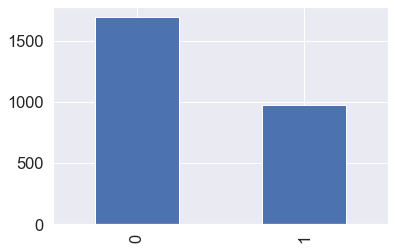

In [214]:
data_occupancy['Occupancy'].value_counts().plot.bar()

# Задание 4:
### Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

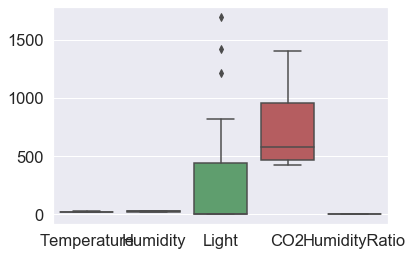

In [215]:
sns.boxplot(data = data_occupancy[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']])

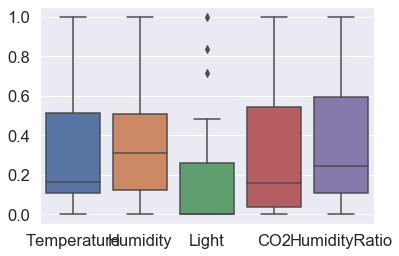

In [216]:
scaler = preprocessing.MinMaxScaler()
data_occupancy[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']] = scaler.fit_transform(data_occupancy[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']].values.astype(float))
sns.boxplot(data=data_occupancy[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']])

# Задание 5:
### Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

In [217]:
data_occupancy['date'].describe()

count                    2665
unique                   2665
top       2015-02-02 15:11:59
freq                        1
Name: date, dtype: object

### Все значения уникальны, замена не требуется

# Задание 6:
###  Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

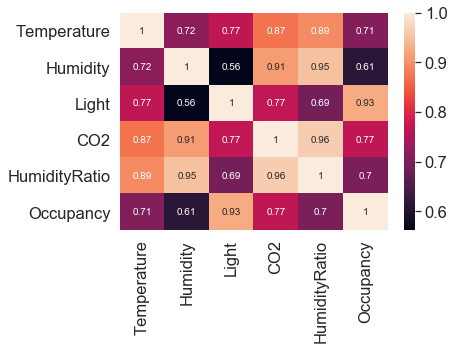

In [218]:
aCorr = data_occupancy.corr()
sns.heatmap(aCorr, annot = True)

# Задание 7:
### Заполните пропущенные значения в данных;

In [219]:
null_data = data_occupancy.isnull()
null_data.sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

## Пропусков нет

# Задание 8:
### Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 

In [220]:
x_data = data_occupancy.drop(('date'), axis=1)
y_data = data_occupancy['Occupancy']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state = 0)

# Логический классификатор

In [297]:
classifier = DecisionTreeClassifier()
classifier_grid = GridSearchCV(classifier, {'max_depth': list(range(1,2)), 'max_features': list(range(1,2))})
classifier_grid.fit(x_train, y_train)
best_score = classifier_grid.best_score_
print('best score', best_score)
classifier = DecisionTreeClassifier(max_depth=classifier_grid.best_estimator_.max_depth, max_features=classifier_grid.best_estimator_.max_features)
classifier.fit(x_train, y_train)
test_score = np.mean(y_test==classifier.predict(x_test))
print('test score: ', test_score)

best score 0.8943699731903486
test score:  0.97875


# Персептрон

In [298]:
classifier_perceptron = Perceptron()
perceptron_grid = GridSearchCV(ppn, {'alpha': np.linspace(0, 1, 20), 'max_iter': [x for x in range(1, 5)]}) 
perceptron_grid  = perceptron_grid .fit(x_train, y_train)
classifier_perceptron = Perceptron(alpha = perceptron_grid .best_estimator_.alpha, max_iter = perceptron_grid .best_estimator_.max_iter)
classifier_perceptron.fit(x_train, y_train)
y_score = classifier_perceptron.predict(x_test)
print("test:", accuracy_score(y_test, y_score))
print("best:", perceptron_grid.best_score_)

test: 1.0
best: 1.0


In [299]:
prob_classifier = CalibratedClassifierCV(classifier).fit(x_train, y_train).predict_proba(x_test)
prob_perceptron = CalibratedClassifierCV(classifier_perceptron).fit(x_train, y_train).predict_proba(x_test)

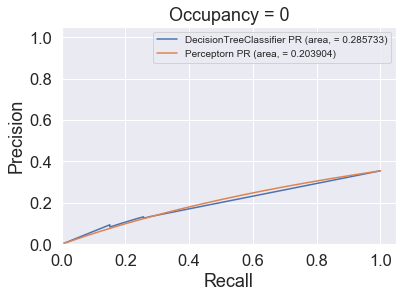

In [300]:
precision, recall, _ = precision_recall_curve(y_test, prob_classifier[:, 0])
aps = average_precision_score(y_test, prob_classifier[:, 0])
plt.plot(recall, precision, label='%s PR (area, = %f)' % ('DecisionTreeClassifier', aps))

precision, recall, _ = precision_recall_curve(y_test, prob_perceptron[:, 0])
aps = average_precision_score(y_test, prob_perceptron[:, 0])
plt.plot(recall, precision, label='%s PR (area, = %f)' % ('Perceptorn', aps))

plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Occupancy = 0')
plt.legend(loc = 1, fontsize = 'medium')
plt.show()

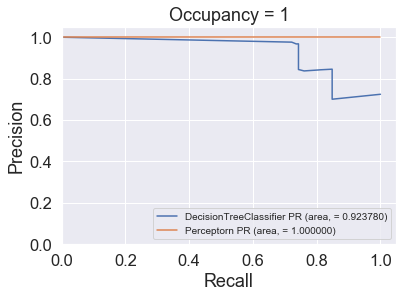

In [301]:
precision, recall, _ = precision_recall_curve(y_test, prob_classifier[:, 1])
aps = average_precision_score(y_test, prob_classifier[:, 1])
plt.plot(recall, precision, label='%s PR (area, = %f)' % ('DecisionTreeClassifier', aps))

precision, recall, _ = precision_recall_curve(y_test, prob_perceptron[:, 1])
aps = average_precision_score(y_test, prob_perceptron[:, 1])
plt.plot(recall, precision, label='%s PR (area, = %f)' % ('Perceptorn', aps))

plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Occupancy = 1')
plt.legend(loc = 4, fontsize = 'medium')
plt.show()

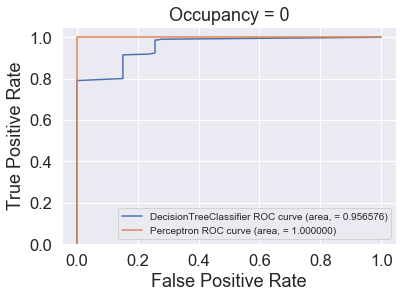

In [302]:
tpr, fpr, thresholds = roc_curve(y_test, prob_classifier[:, 0])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC curve (area, = %f)' % ('DecisionTreeClassifier', roc_auc))

tpr, fpr, thresholds = roc_curve(y_test, prob_perceptron[:, 0])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC curve (area, = %f)' % ('Perceptron', roc_auc))


plt.xlim([-0.05, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 4, fontsize = 'medium')
plt.title('Occupancy = 0')
plt.show()

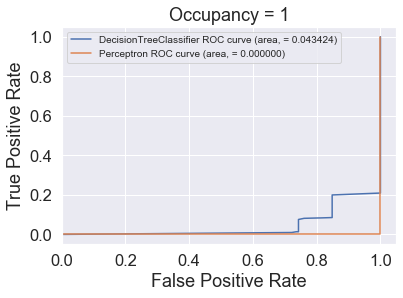

In [303]:
tpr, fpr, thresholds = roc_curve(y_test, prob_classifier[:, 1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC curve (area, = %f)' % ('DecisionTreeClassifier', roc_auc))

tpr, fpr, thresholds = roc_curve(y_test, prob_perceptron[:, 1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC curve (area, = %f)' % ('Perceptron', roc_auc))

plt.xlim([0, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 2, fontsize = 'medium')
plt.title('Occupancy = 1')
plt.show()

# Задание 9:

## Вывод: классификатор Perceptron лучше